Dataset shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


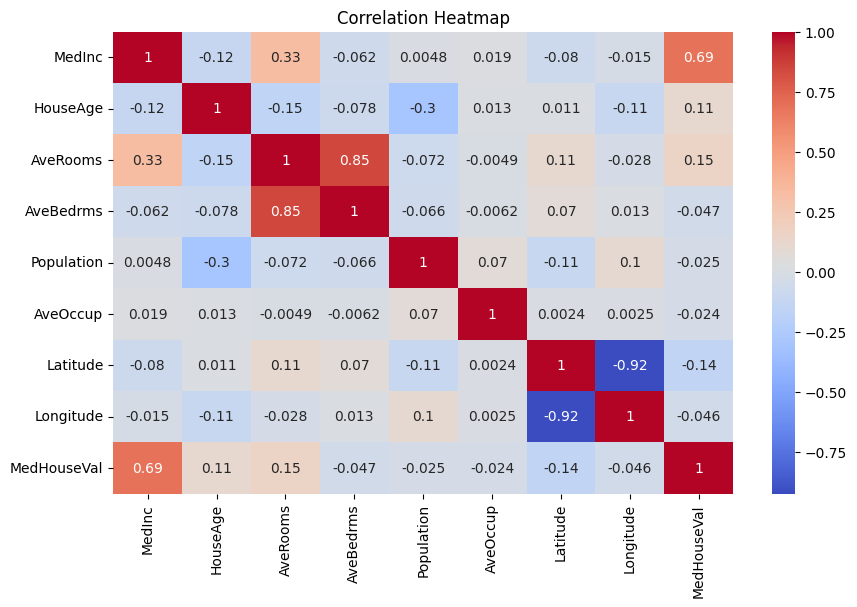


Linear Regression Performance:
MSE: 0.5558915986952442
R²: 0.575787706032451

Best Ridge alpha: {'alpha': np.float64(0.6951927961775606)}
Ridge MSE: 0.5558634864083699
Ridge R²: 0.5758091590958387


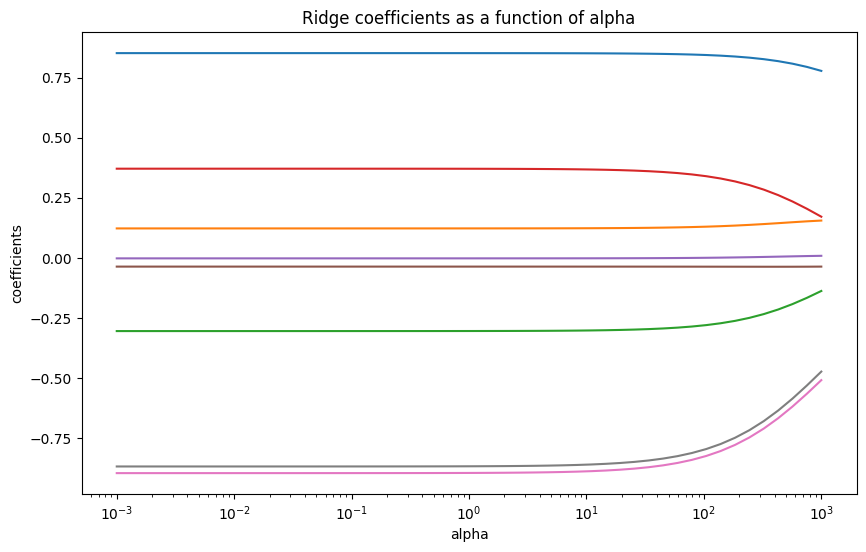


Best Lasso alpha: {'alpha': np.float64(0.001)}
Lasso MSE: 0.5544062174455686
Lasso R²: 0.5769212309657656
Number of non-zero coefficients in Lasso: 8


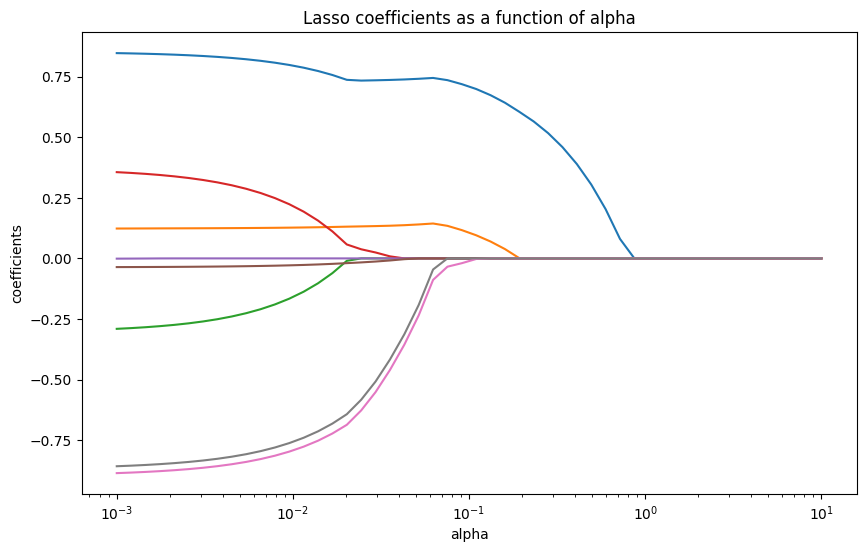


Model Comparison:
Linear R²: 0.5758
Ridge  R²: 0.5758
Lasso  R²: 0.5769

Insights:
- Ridge shrinks coefficients but keeps all features.
- Lasso drives some coefficients to zero (feature selection).
- Regularization helps reduce overfitting and improves generalization.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load dataset
data = pd.read_csv("california_housing.csv")
print("Dataset shape:", data.shape)
print(data.head())

# 3. Data exploration
print("\nMissing values:\n", data.isnull().sum())

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 4. Preprocessing
X = data.drop("MedHouseVal", axis=1)
y = data["MedHouseVal"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 5. Baseline Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
print("\nLinear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R²:", r2_score(y_test, y_pred_lin))

# 6. Ridge Regression with cross-validation
ridge = Ridge()
params = {"alpha": np.logspace(-3, 3, 20)}
ridge_cv = GridSearchCV(ridge, params, cv=5, scoring="r2")
ridge_cv.fit(X_train, y_train)

print("\nBest Ridge alpha:", ridge_cv.best_params_)
y_pred_ridge = ridge_cv.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))

# Coefficients vs alpha
alphas = np.logspace(-3, 3, 50)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10,6))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Ridge coefficients as a function of alpha")
plt.show()

# 7. Lasso Regression with cross-validation
lasso = Lasso(max_iter=5000)
params = {"alpha": np.logspace(-3, 1, 20)}
lasso_cv = GridSearchCV(lasso, params, cv=5, scoring="r2")
lasso_cv.fit(X_train, y_train)

print("\nBest Lasso alpha:", lasso_cv.best_params_)
y_pred_lasso = lasso_cv.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Number of non-zero coefficients in Lasso:", np.sum(lasso_cv.best_estimator_.coef_ != 0))

# Coefficients vs alpha
coefs = []
for a in np.logspace(-3, 1, 50):
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10,6))
plt.plot(np.logspace(-3, 1, 50), coefs)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Lasso coefficients as a function of alpha")
plt.show()

# 8. Model Comparison
print("\nModel Comparison:")
print(f"Linear R²: {r2_score(y_test, y_pred_lin):.4f}")
print(f"Ridge  R²: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Lasso  R²: {r2_score(y_test, y_pred_lasso):.4f}")

# 9. Insights
print("\nInsights:")
print("- Ridge shrinks coefficients but keeps all features.")
print("- Lasso drives some coefficients to zero (feature selection).")
print("- Regularization helps reduce overfitting and improves generalization.")
